# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 29.0 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "kaggle_username"
kaggle_key = "kaggle_key"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms


In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 42.1MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates=['datetime'])

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [8]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates=['datetime'])

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [9]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])

submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  6493 non-null   datetime64[ns]
 1   count     6493 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 101.6 KB


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [10]:
train.drop(['casual', 'registered'], axis=1, inplace=True)

In [11]:
predictor = TabularPredictor(
    label="count", problem_type="regression", eval_metric="root_mean_squared_error"
).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality",
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220729_084336/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220729_084336/"
AutoGluon Version:  0.5.2
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12674.86 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Sta

### Review AutoGluon's training run with ranking of models that did the best.

In [12]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.032029      17.241097  561.174174                0.001403           0.254146            3       True         14
1   RandomForestMSE_BAG_L2  -53.285338      13.275966  418.682671                0.661396          31.427659            2       True         12
2          LightGBM_BAG_L2  -55.189999      12.915682  411.242162                0.301111          23.987150            2       True         11
3          CatBoost_BAG_L2  -55.809618      12.675617  448.168955                0.061047          60.913943            2       True         13
4        LightGBMXT_BAG_L2  -60.396110      16.216139  444.591275                3.601569          57.336263            2       True         10
5    KNeighborsDist_BAG_L1  -84.125061       0.104602    0.036198         

{'leaderboard':                      model   score_val  pred_time_val    fit_time  \
 0      WeightedEnsemble_L3  -53.032029      17.241097  561.174174   
 1   RandomForestMSE_BAG_L2  -53.285338      13.275966  418.682671   
 2          LightGBM_BAG_L2  -55.189999      12.915682  411.242162   
 3          CatBoost_BAG_L2  -55.809618      12.675617  448.168955   
 4        LightGBMXT_BAG_L2  -60.396110      16.216139  444.591275   
 5    KNeighborsDist_BAG_L1  -84.125061       0.104602    0.036198   
 6      WeightedEnsemble_L2  -84.125061       0.106996    0.598868   
 7    KNeighborsUnif_BAG_L1 -101.546199       0.103719    0.056135   
 8   RandomForestMSE_BAG_L1 -116.544294       0.660683   13.226887   
 9     ExtraTreesMSE_BAG_L1 -124.588053       0.648110    5.638805   
 10         CatBoost_BAG_L1 -130.548053       0.129922  192.858817   
 11         LightGBM_BAG_L1 -131.054162       1.401267   27.672303   
 12       LightGBMXT_BAG_L1 -131.460909       9.079154   82.258341   
 13  

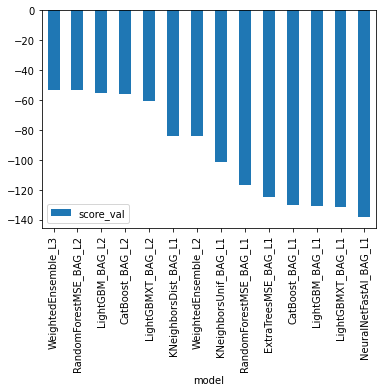

In [13]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

In [14]:
predictions = predictor.predict(test)
predictions.head()

0    22.909698
1    40.977623
2    45.255711
3    48.677265
4    51.826530
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [15]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.826797
std        90.015465
min         3.071176
25%        19.926075
50%        64.056122
75%       166.951981
max       365.606262
Name: count, dtype: float64

In [16]:
# How many negative values do we have?
#there is no negative values appeard in predictions.describe()

In [17]:
# Set them to zero
# no negative values

### Set predictions to submission dataframe, save, and submit

In [18]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [19]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 483kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [20]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2022-07-29 08:54:16  first raw submission               complete  1.79749      1.79749       
submission_new_hpo.csv       2022-07-28 23:51:34  new features with hyperparameters  complete  0.65606      0.65606       
submission_new_features.csv  2022-07-28 23:39:26  new features                       complete  0.67588      0.67588       
submission.csv               2022-07-28 23:28:27  first raw submission               complete  1.79316      1.79316       


#### Initial score of `1.79316 `

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

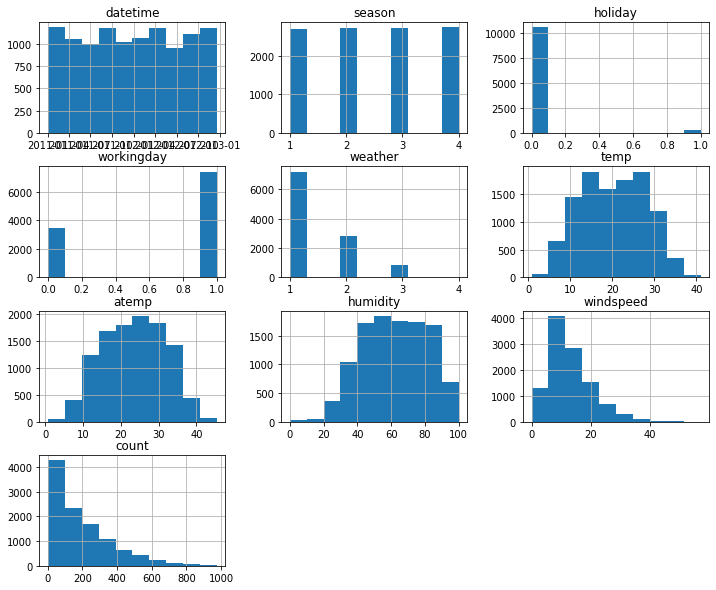

In [21]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist( figsize=(12, 10));

In [22]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,16


In [23]:
# create a new feature
train['hour'] = train.datetime.dt.hour
test['hour'] = test.datetime.dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [24]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
train["holiday"] = train["holiday"].astype('category')
train["workingday"] = train["workingday"].astype('category')

test["holiday"] = test["holiday"].astype('category')
test["workingday"] = test["workingday"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [25]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4


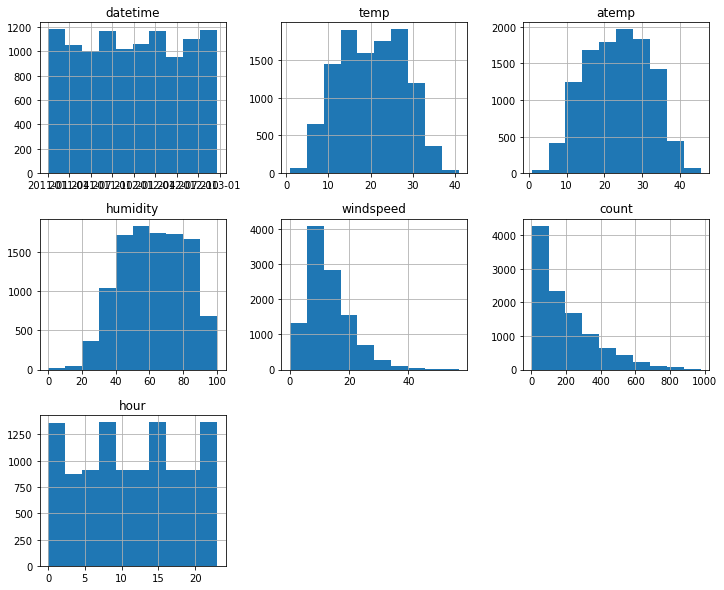

In [26]:
# View histogram of all features again now with the hour feature
train.hist( figsize=(12, 10));

## Step 5: Rerun the model with the same settings as before, just with more features

In [27]:
predictor_new_features = TabularPredictor(
    label="count", problem_type="regression", eval_metric="root_mean_squared_error"
).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality",
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220729_085421/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220729_085421/"
AutoGluon Version:  0.5.2
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 10
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11925.96 MB
	Train Data (Original)  Memory Usage: 0.57 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	St

In [28]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.284949      24.904576  561.785259                0.001058           0.254925            3       True         14
1          LightGBM_BAG_L2  -30.681711      22.948000  428.411675                0.383620          26.298465            2       True         11
2          CatBoost_BAG_L2  -30.735251      22.708144  455.235917                0.143764          53.122706            2       True         13
3        LightGBMXT_BAG_L2  -30.985403      23.609911  433.100022                1.045531          30.986811            2       True         10
4   RandomForestMSE_BAG_L2  -31.552088      23.330603  451.122352                0.766222          49.009141            2       True         12
5      WeightedEnsemble_L2  -32.200184      19.824021  353.134969         

{'leaderboard':                      model   score_val  pred_time_val    fit_time  \
 0      WeightedEnsemble_L3  -30.284949      24.904576  561.785259   
 1          LightGBM_BAG_L2  -30.681711      22.948000  428.411675   
 2          CatBoost_BAG_L2  -30.735251      22.708144  455.235917   
 3        LightGBMXT_BAG_L2  -30.985403      23.609911  433.100022   
 4   RandomForestMSE_BAG_L2  -31.552088      23.330603  451.122352   
 5      WeightedEnsemble_L2  -32.200184      19.824021  353.134969   
 6          LightGBM_BAG_L1  -33.919639       3.141061   42.969059   
 7          CatBoost_BAG_L1  -34.218085       0.257566  201.006677   
 8        LightGBMXT_BAG_L1  -34.457274      15.610569   94.193534   
 9     ExtraTreesMSE_BAG_L1  -38.323016       1.927837   13.509511   
 10  RandomForestMSE_BAG_L1  -38.445932       0.708339   14.281955   
 11   KNeighborsDist_BAG_L1  -84.125061       0.105030    0.036537   
 12   KNeighborsUnif_BAG_L1 -101.546199       0.104113    0.052527   
 13  

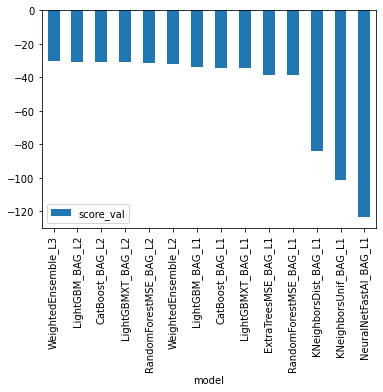

In [29]:
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [30]:
predictions = predictor_new_features.predict(test)
predictions.head()

0    16.878788
1    10.768086
2    10.308929
3     8.847742
4     7.785563
Name: count, dtype: float32

In [31]:
predictions.describe()

count    6493.000000
mean      158.701477
std       138.712326
min         2.111123
25%        50.942383
50%       121.624252
75%       228.309235
max       807.832581
Name: count, dtype: float64

In [32]:
# Remember to set all negative values to zero
# no negative values..

In [33]:
# Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])

submission_new_features["count"] = predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [34]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 511kB/s]
Successfully submitted to Bike Sharing Demand

In [35]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6 

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2022-07-29 09:05:17  new features                       complete  0.64076      0.64076       
submission.csv               2022-07-29 08:54:16  first raw submission               complete  1.79749      1.79749       
submission_new_hpo.csv       2022-07-28 23:51:34  new features with hyperparameters  complete  0.65606      0.65606       
submission_new_features.csv  2022-07-28 23:39:26  new features                       complete  0.67588      0.67588       


#### New Score of `0.67588`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [36]:


predictor_new_hpo = TabularPredictor(
    label="count", problem_type="regression", eval_metric="root_mean_squared_error"
).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality",

    hyperparameters='multimodal',
    hyperparameter_tune_kwargs='auto'

)

No path specified. Models will be saved in: "AutogluonModels/ag-20220729_092315/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220729_092315/"
AutoGluon Version:  0.5.2
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 10
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11573.96 MB
	Train Data (Original)  Memory Usage: 0.57 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	St

[1000]	valid_set's rmse: 33.1807
[2000]	valid_set's rmse: 33.0157


	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-32.965	 = Validation score   (-root_mean_squared_error)
	3.81s	 = Training   runtime
	0.24s	 = Validation runtime
Hyperparameter tuning model: LightGBMXT_BAG_L1 ... Tuning model for up to 5.0s of the 594.2s of remaining time.


[1000]	valid_set's rmse: 35.7814
[2000]	valid_set's rmse: 33.8949
[3000]	valid_set's rmse: 33.4593


	Ran out of time, early stopping on iteration 3475. Best iteration is:
	[3475]	valid_set's rmse: 33.4015
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L1/T1 ...
	-33.4015	 = Validation score   (-root_mean_squared_error)
	4.89s	 = Training   runtime
	0.47s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L1 ... Tuning model for up to 5.0s of the 586.48s of remaining time.
	Ran out of time, early stopping on iteration 468.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	-38.1364	 = Validation score   (-root_mean_squared_error)
	3.99s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L1 ... Tuning model for up to 5.0s of the 582.4s of remaining time.
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	-33.5364	 = Validation score   (-root_mean_squared_error)
	4.82s	 = Training   runtime
	0.06s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_

In [37]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L3 -32.263705      19.229700  470.119037                0.000827           0.332794            3       True         12
1    WeightedEnsemble_L2 -32.426684      18.395363  340.923066                0.001083           0.266869            2       True          6
2     CatBoost_BAG_L2/T1 -32.446998      18.522716  389.077572                0.128437          48.421375            2       True          9
3     LightGBM_BAG_L2/T1 -32.583186      18.625420  367.461163                0.231140          26.804966            2       True          7
4      XGBoost_BAG_L2/T1 -32.945294      18.580475  363.333025                0.186195          22.676828            2       True         10
5   LightGBMLarge_BAG_L2 -33.193396      18.683101  371.883075                0.288821      

{'leaderboard':                    model  score_val  pred_time_val    fit_time  \
 0    WeightedEnsemble_L3 -32.263705      19.229700  470.119037   
 1    WeightedEnsemble_L2 -32.426684      18.395363  340.923066   
 2     CatBoost_BAG_L2/T1 -32.446998      18.522716  389.077572   
 3     LightGBM_BAG_L2/T1 -32.583186      18.625420  367.461163   
 4      XGBoost_BAG_L2/T1 -32.945294      18.580475  363.333025   
 5   LightGBMLarge_BAG_L2 -33.193396      18.683101  371.883075   
 6   LightGBMLarge_BAG_L1 -33.370103       0.173463    5.685549   
 7   LightGBMXT_BAG_L2/T1 -33.543286      18.690671  362.520698   
 8     LightGBM_BAG_L1/T1 -33.919639       2.797889   40.223880   
 9   LightGBMXT_BAG_L1/T1 -34.460410      14.810127   89.314685   
 10     XGBoost_BAG_L1/T1 -34.657536       0.586527   34.521564   
 11    CatBoost_BAG_L1/T1 -35.118659       0.199737  176.596069   
 
     pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
 0                 0.000827           

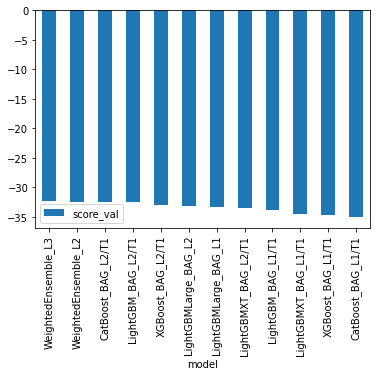

In [38]:
predictor_new_hpo.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [39]:
predictions = predictor_new_hpo.predict(test)
predictions.head()

0    12.710226
1     7.366828
2     7.055054
3     6.916327
4     6.933709
Name: count, dtype: float32

In [40]:
predictions.describe()

count    6493.000000
mean      190.618256
std       173.123566
min         6.270659
25%        47.083755
50%       149.182571
75%       281.463898
max       872.770935
Name: count, dtype: float64

In [ ]:
# Remember to set all negative values to zero
# no negative values.

In [41]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('sampleSubmission.csv')
submission_new_hpo['datetime'] = pd.to_datetime(submission_new_hpo['datetime'])

submission_new_hpo["count"] = predictions
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [42]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 434kB/s]
Successfully submitted to Bike Sharing Demand

In [43]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-07-29 09:35:01  new features with hyperparameters  complete  0.48900      0.48900       
submission_new_features.csv  2022-07-29 09:05:17  new features                       complete  0.64076      0.64076       
submission.csv               2022-07-29 08:54:16  first raw submission               complete  1.79749      1.79749       
submission_new_hpo.csv       2022-07-28 23:51:34  new features with hyperparameters  complete  0.65606      0.65606       


#### New Score of `0.48900`





> Indented block



## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

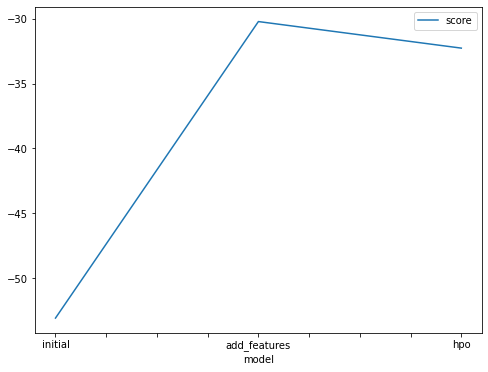

In [44]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.070380, -30.216353,  -32.263705]
    } 
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

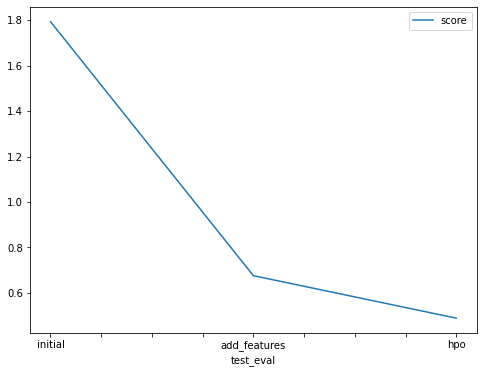

In [46]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.79316,     0.67588,  0.48900]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [47]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model"                     : ["initial", "add_features", "hpo"],
    "hyperparameters"           : [   'None',  'None', 'multimodal'],
    "hyperparameter_tune_kwargs": [   'None',  'None',       'auto'],
    "score"                     : [1.79316,     0.67588,  0.48900]
})

,model,hyperparameters,hyperparameter_tune_kwargs,score
0,initial,None,None,1.79316
1,add_features,None,None,0.67588
2,hpo,multimodal,auto,0.48900
